# This notebook demonstrates how to propagate errors in Cpx-Liquid thermobarometry
- This builds on from the notebook showing how to consider error in a single phase (Liquid_Thermometry_error_prop.ipynb). We suggest you look at that first, as its simpler when you don't have to worry about two separate phases
- We use the experimental data of Feig et al. (2010) - DOI 10.1007/s00410-010-0493-3, and the author-stated 1 sigma errors

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("..")
import matplotlib.pyplot as plt
import Thermobar as pt
import sympy as sym
pd.options.display.max_columns = None

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

## Simple 5% error example

# Step 1 - Import Cpx and Liquid data

In [3]:
out=pt.import_excel('Cpx_Liq_error_prop_Feig2010_example.xlsx', sheet_name="Sheet1")
my_input=out['my_input']
myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']

In [5]:
a=pt.calculate_cpx_only_press_temp(cpx_comps=myCpxs1, equationP="P_Put2008_eq32a", 
                           equationT="T_Put2008_eq32d")

a.head()

,P_kbar_calc,T_K_calc,Delta_P_kbar_Iter,Delta_T_K_Iter,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,7.286947,1504.081457,0.000000e+00,0.000000e+00,51.075956,0.325086,4.892502,5.714957,0.165700,16.897042,20.466034,0.319704,0,0.252186,0
1,5.688497,1482.813216,0.000000e+00,0.000000e+00,51.578350,0.356860,3.600200,6.390180,0.171190,16.402000,20.388060,0.332720,0,0.186270,1
2,7.376131,1513.499934,4.547474e-13,3.865352e-12,51.567875,0.256271,4.763807,4.229021,0.000000,16.969344,21.061352,0.316506,0,0.528929,2
3,7.093107,1505.881234,0.000000e+00,0.000000e+00,52.083950,0.325983,3.919567,5.285317,0.168583,16.604683,20.364050,0.318067,0,0.377937,3
4,8.376068,1512.137825,0.000000e+00,0.000000e+00,52.331846,0.406175,3.974610,6.039907,0.173175,16.297102,19.784783,0.388863,0,0.285975,4


# Step 2 - Add 5% error to Na2O in Cpx, no error to liquid compositions

In [4]:
# Sample_c=myLiquids1
# Sample_c.index = Sample_c.index.astype("float")
# TEST=Sample_c.index.values
# for i in range(0, len(Sample_c)):
#     print(TEST[i])
#     Sample_c.loc[i, 'Sample_ID_Liq']=Sample_c['Sample_ID_Liq'].iloc[i]+'_'+str(TEST[i])


In [5]:
# Sample_c['Sample_ID_Liq']=Sample_c.index.values[0:]

In [6]:
# Sample_c['Sample_ID_Liq']

In [7]:

Cpx_5Na2O=pt.add_noise_sample_1phase(phase_comp=myCpxs1, variable="Na2O", 
          variable_err=5, variable_err_type="Perc", duplicates=1000, 
          err_dist="normal")

All negative numbers replaced with zeros. If you wish to keep these, set positive=False


In [8]:
Liquids_only_noNoise=pt.add_noise_sample_1phase(phase_comp=myLiquids1, 
                        noise_percent=0, duplicates=1000, err_dist="normal")

All negative numbers replaced with zeros. If you wish to keep these, set positive=False


g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\noise_averaging.py:232: UserWarning: Non unique sample names. We have appended the index onto all sample names to save issues with averaging later
  w.warn('Non unique sample names. We have appended the index onto all sample names to save issues with averaging later')


In [9]:
Liquids_only_noNoise

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq_Num,Sample_ID_Liq
0,50.973845,0.489282,19.349173,5.327336,0.0,4.511373,9.161873,4.205536,0.0,0.0,0.0,5.12,0.0,0.0,0.0,0.0,0,Feig2010_e142_0
1,50.973845,0.489282,19.349173,5.327336,0.0,4.511373,9.161873,4.205536,0.0,0.0,0.0,5.12,0.0,0.0,0.0,0.0,0,Feig2010_e142_0
2,50.973845,0.489282,19.349173,5.327336,0.0,4.511373,9.161873,4.205536,0.0,0.0,0.0,5.12,0.0,0.0,0.0,0.0,0,Feig2010_e142_0
3,50.973845,0.489282,19.349173,5.327336,0.0,4.511373,9.161873,4.205536,0.0,0.0,0.0,5.12,0.0,0.0,0.0,0.0,0,Feig2010_e142_0
4,50.973845,0.489282,19.349173,5.327336,0.0,4.511373,9.161873,4.205536,0.0,0.0,0.0,5.12,0.0,0.0,0.0,0.0,0,Feig2010_e142_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,53.426280,0.501420,18.534540,4.574460,0.0,7.386060,11.281980,3.673100,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.0,6,Feig2010_6
6996,53.426280,0.501420,18.534540,4.574460,0.0,7.386060,11.281980,3.673100,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.0,6,Feig2010_6
6997,53.426280,0.501420,18.534540,4.574460,0.0,7.386060,11.281980,3.673100,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.0,6,Feig2010_6
6998,53.426280,0.501420,18.534540,4.574460,0.0,7.386060,11.281980,3.673100,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.0,6,Feig2010_6


# Step 3 - Calculate pressures and temperatures iteratively for these two dataframes

In [10]:

Out_5_noise_cpx=pt.calculate_cpx_liq_press_temp(liq_comps=Liquids_only_noNoise, cpx_comps=Cpx_5Na2O, 
                                    equationP="P_Put2008_eq31", equationT="T_Put2008_eq33", eq_tests=True)


Using Fe3FeT from input file to calculate Kd Fe-Mg


In [11]:
Liquids_only_noNoise

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq_Num,Sample_ID_Liq
0,50.973845,0.489282,19.349173,5.327336,0.0,4.511373,9.161873,4.205536,0.0,0.0,0.0,5.12,0.0,0.0,0.0,0.0,0,Feig2010_e142_0
1,50.973845,0.489282,19.349173,5.327336,0.0,4.511373,9.161873,4.205536,0.0,0.0,0.0,5.12,0.0,0.0,0.0,0.0,0,Feig2010_e142_0
2,50.973845,0.489282,19.349173,5.327336,0.0,4.511373,9.161873,4.205536,0.0,0.0,0.0,5.12,0.0,0.0,0.0,0.0,0,Feig2010_e142_0
3,50.973845,0.489282,19.349173,5.327336,0.0,4.511373,9.161873,4.205536,0.0,0.0,0.0,5.12,0.0,0.0,0.0,0.0,0,Feig2010_e142_0
4,50.973845,0.489282,19.349173,5.327336,0.0,4.511373,9.161873,4.205536,0.0,0.0,0.0,5.12,0.0,0.0,0.0,0.0,0,Feig2010_e142_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,53.426280,0.501420,18.534540,4.574460,0.0,7.386060,11.281980,3.673100,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.0,6,Feig2010_6
6996,53.426280,0.501420,18.534540,4.574460,0.0,7.386060,11.281980,3.673100,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.0,6,Feig2010_6
6997,53.426280,0.501420,18.534540,4.574460,0.0,7.386060,11.281980,3.673100,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.0,6,Feig2010_6
6998,53.426280,0.501420,18.534540,4.574460,0.0,7.386060,11.281980,3.673100,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.0,6,Feig2010_6


# Step 4 - Calculate Statistics for each inputted cpx-liq pair

In [12]:
Stats_P_kbar=pt.av_noise_samples_series(calc=Out_5_noise_cpx['P_kbar_calc'], 
                                        sampleID=Out_5_noise_cpx['Sample_ID_Liq'])
Stats_P_kbar

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,Feig2010_e142_0,1000,3.944778,3.954911,0.242792,4.652993,3.172481
1,Feig2010_e146_1,1000,3.745615,3.749175,0.227286,4.328572,2.909834
2,Feig2010_e148_2,1000,4.353892,4.357087,0.253889,5.177370,3.564741
3,Feig2010_e153_3,1000,4.517402,4.513357,0.261390,5.436667,3.757414
4,Feig2010_4,1000,5.881582,5.888855,0.266097,6.667585,4.906255
5,Feig2010_5,1000,8.090588,8.088011,0.280501,9.062570,7.195346
6,Feig2010_6,1000,6.228325,6.224749,0.282195,7.046040,5.291457


# Step 5 - Plot histogram for the first entered cpx-liq pair

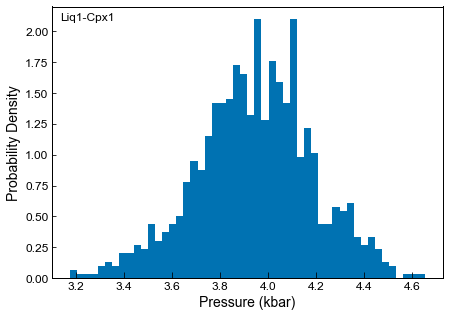

In [13]:
fig, ((ax1)) = plt.subplots(1, 1, figsize=(7, 5))
ax1.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==0, 
                             "P_kbar_calc"], bins=50, density = True)
ax1.annotate("Liq1-Cpx1", xy=(0.02, 0.95), xycoords="axes fraction",
             fontsize=12)
ax1.set_xlabel('Pressure (kbar)')
ax1.set_ylabel('Probability Density')
fig.savefig('5%error_cpx.png', dpi=300)


# Step 1 - Import Cpx and Liquid data

In [ ]:
out=pt.import_excel('Cpx_Liq_error_prop_Feig2010_example.xlsx', sheet_name="Sheet1")
my_input=out['my_input']
myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']

In [ ]:
myCpxs1

# Step 2 - Import Errors for cpx and Liquids

In [ ]:
out_err=pt.import_excel_errors('Cpx_Liq_error_prop_Feig2010_example.xlsx', sheet_name="Sheet1")
myLiquids1_err=out_err['Liqs_Err']
myCpxs1_err=out_err['Cpxs_Err']
myinput_Out=out_err['my_input_Err']

In [ ]:
myLiquids1_err['Sample_ID_Liq_Err']=myLiquids1['Sample_ID_Liq']

# Step 3 - create 1000 duplicates per row with normally-distributed noise based on published 1$\sigma$

In [ ]:
Liquids_st_noise=pt.add_noise_sample_1phase(phase_comp=myLiquids1, phase_err=myLiquids1_err,
                                             phase_err_type="Abs", duplicates=1000, err_dist="normal")

Cpxs_st_noise=pt.add_noise_sample_1phase(phase_comp=myCpxs1, phase_err=myCpxs1_err,
                                             phase_err_type="Abs", duplicates=1000, err_dist="normal")

In [ ]:
Syn_Liqs_e142=Liquids_st_noise.loc[Liquids_st_noise['Sample_ID_Liq']=="Feig2010_e142"]
Real_Liq_e142=myLiquids1.loc[myLiquids1['Sample_ID_Liq']=="Feig2010_e142"]
Real_Liq_e142_Err=myLiquids1_err.loc[myLiquids1_err['Sample_ID_Liq_Err']=="Feig2010_e142"]

In [ ]:
myLiquids1_err

In [ ]:
fig, (ax1) = plt.subplots(1, figsize=(5,4))
ax1.hist(Syn_Liqs_e142['SiO2_Liq'], bins=50, ec='grey', color='red');
ax1.plot([Real_Liq_e142['SiO2_Liq'], Real_Liq_e142['SiO2_Liq']],
         [0, 60], '-k', lw=3)
ax1.plot([Real_Liq_e142['SiO2_Liq']+Real_Liq_e142_Err['SiO2_Liq_Err'], 
          Real_Liq_e142['SiO2_Liq']+Real_Liq_e142_Err['SiO2_Liq_Err']],
         [0, 60], ':k', lw=3)
ax1.plot([Real_Liq_e142['SiO2_Liq']-Real_Liq_e142_Err['SiO2_Liq_Err'], 
          Real_Liq_e142['SiO2_Liq']-Real_Liq_e142_Err['SiO2_Liq_Err']],
         [0, 60], ':k', lw=3)
ax1.set_ylabel('# of simulations')
ax1.set_xlabel('SiO$_2$ (wt%)')
fig.savefig('Simulated_SiO2_e142.png', dpi=200)

In [ ]:
fig, (ax1) = plt.subplots(1, figsize=(5,4))
ax1.hist(Syn_Liqs_e142['MgO_Liq'], bins=50, ec='grey', color='red');
ax1.plot([Real_Liq_e142['MgO_Liq'], Real_Liq_e142['MgO_Liq']],
         [0, 60], '-k', lw=3)
ax1.plot([Real_Liq_e142['MgO_Liq']+Real_Liq_e142_Err['MgO_Liq_Err'], 
          Real_Liq_e142['MgO_Liq']+Real_Liq_e142_Err['MgO_Liq_Err']],
         [0, 60], ':k', lw=3)
ax1.plot([Real_Liq_e142['MgO_Liq']-Real_Liq_e142_Err['MgO_Liq_Err'], 
          Real_Liq_e142['MgO_Liq']-Real_Liq_e142_Err['MgO_Liq_Err']],
         [0, 60], ':k', lw=3)
ax1.set_ylabel('# of simulations')
ax1.set_xlabel('MgO (wt%)')
fig.savefig('Simulated_MgO_e142.png', dpi=200)

In [ ]:
Real_Liq_e142_Err

# Step 4 - Calculate pressures and temperatures iteratively for these new dataframes

In [ ]:
Cpx_Liq_with_noise=pt.calculate_cpx_liq_press_temp(liq_comps=Liquids_st_noise, cpx_comps=Cpxs_st_noise, 
             equationP="P_Put2008_eq31", equationT="T_Put2008_eq33", eq_tests=True)

# Step 5 - Calculate statistics for each inputted cpx-liq pair

In [24]:
Stats_P_kbar=pt.av_noise_samples_series(calc=Cpx_Liq_with_noise['P_kbar_calc'], 
                            sampleID=Cpx_Liq_with_noise['Sample_ID_Liq'])
Stats_P_kbar.head()

g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\noise_averaging.py:38: RuntimeWarning: Mean of empty slice
  Av_mean[i] = np.nanmean(calc[sampleID == i])
C:\Users\penny\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\penny\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


ValueError: zero-size array to reduction operation minimum which has no identity

In [33]:
Stats_P_kbar=pt.av_noise_samples_df(dataframe=Out_st_noise['P_kbar_calc'], 
                calc_heading='P_kbar_calc', ID_heading='Sample_ID_Liq_Num')
Stats_P_kbar.head()


KeyError: 'calc_heading'

In [25]:
Stats_P_kbar=pt.av_noise_samples_series(Out_st_noise['P_kbar_calc'], Liquids_st_noise['Sample_ID_Liq_Num'])
Stats_P_kbar

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sample,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,3.889951,3.940285,0.839779,6.077707,0.137175
1,1.0,3.447472,3.724100,1.756871,6.548999,-17.761073
2,2.0,3.942508,4.174495,2.110455,8.883845,-6.526874
3,3.0,4.446269,4.531242,0.905539,6.821825,0.058097
4,4.0,5.886842,5.922160,0.924334,8.584534,2.320500
5,5.0,8.104927,8.114702,0.478385,9.407493,6.546494
6,6.0,6.203717,6.225493,0.503343,7.446004,3.775613


# Step 6 - Plot histogram for each user-entered row

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Probability Density')

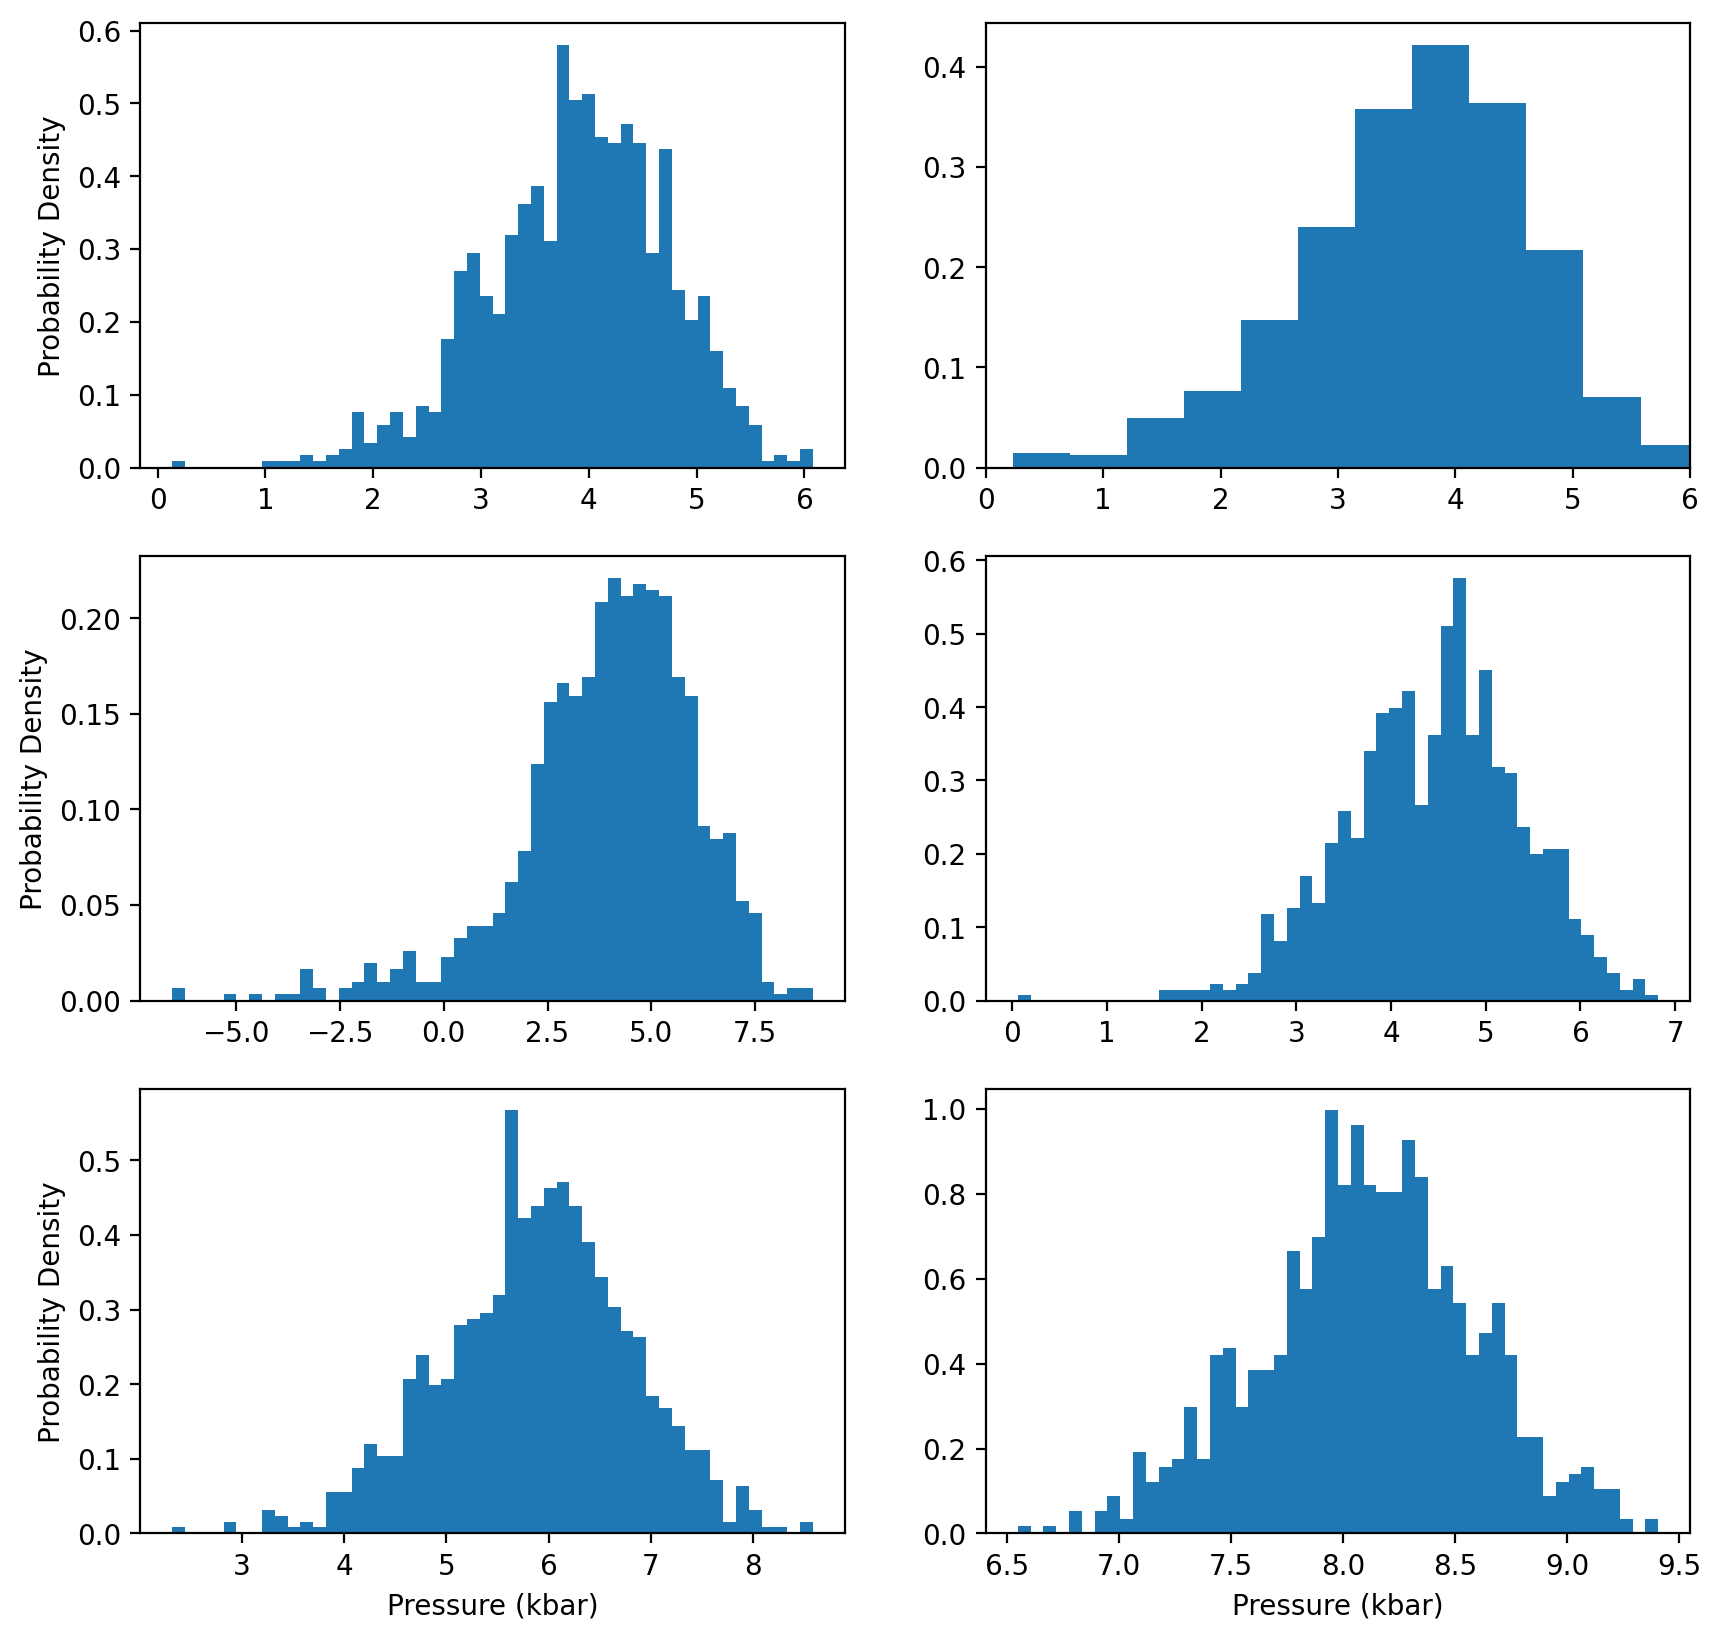

In [26]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Liq_Num']==0, "P_kbar_calc"], bins=50, density = True)
ax2.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Liq_Num']==1, "P_kbar_calc"], bins=50, density = True)
ax2.set_xlim([0, 6])
ax1.set_xlabel('Pressure (kbar)')
ax2.set_xlabel('Pressure (kbar)')
ax1.set_ylabel('Probability Density')
ax2.set_ylabel('Probability Density')


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Probability Density')

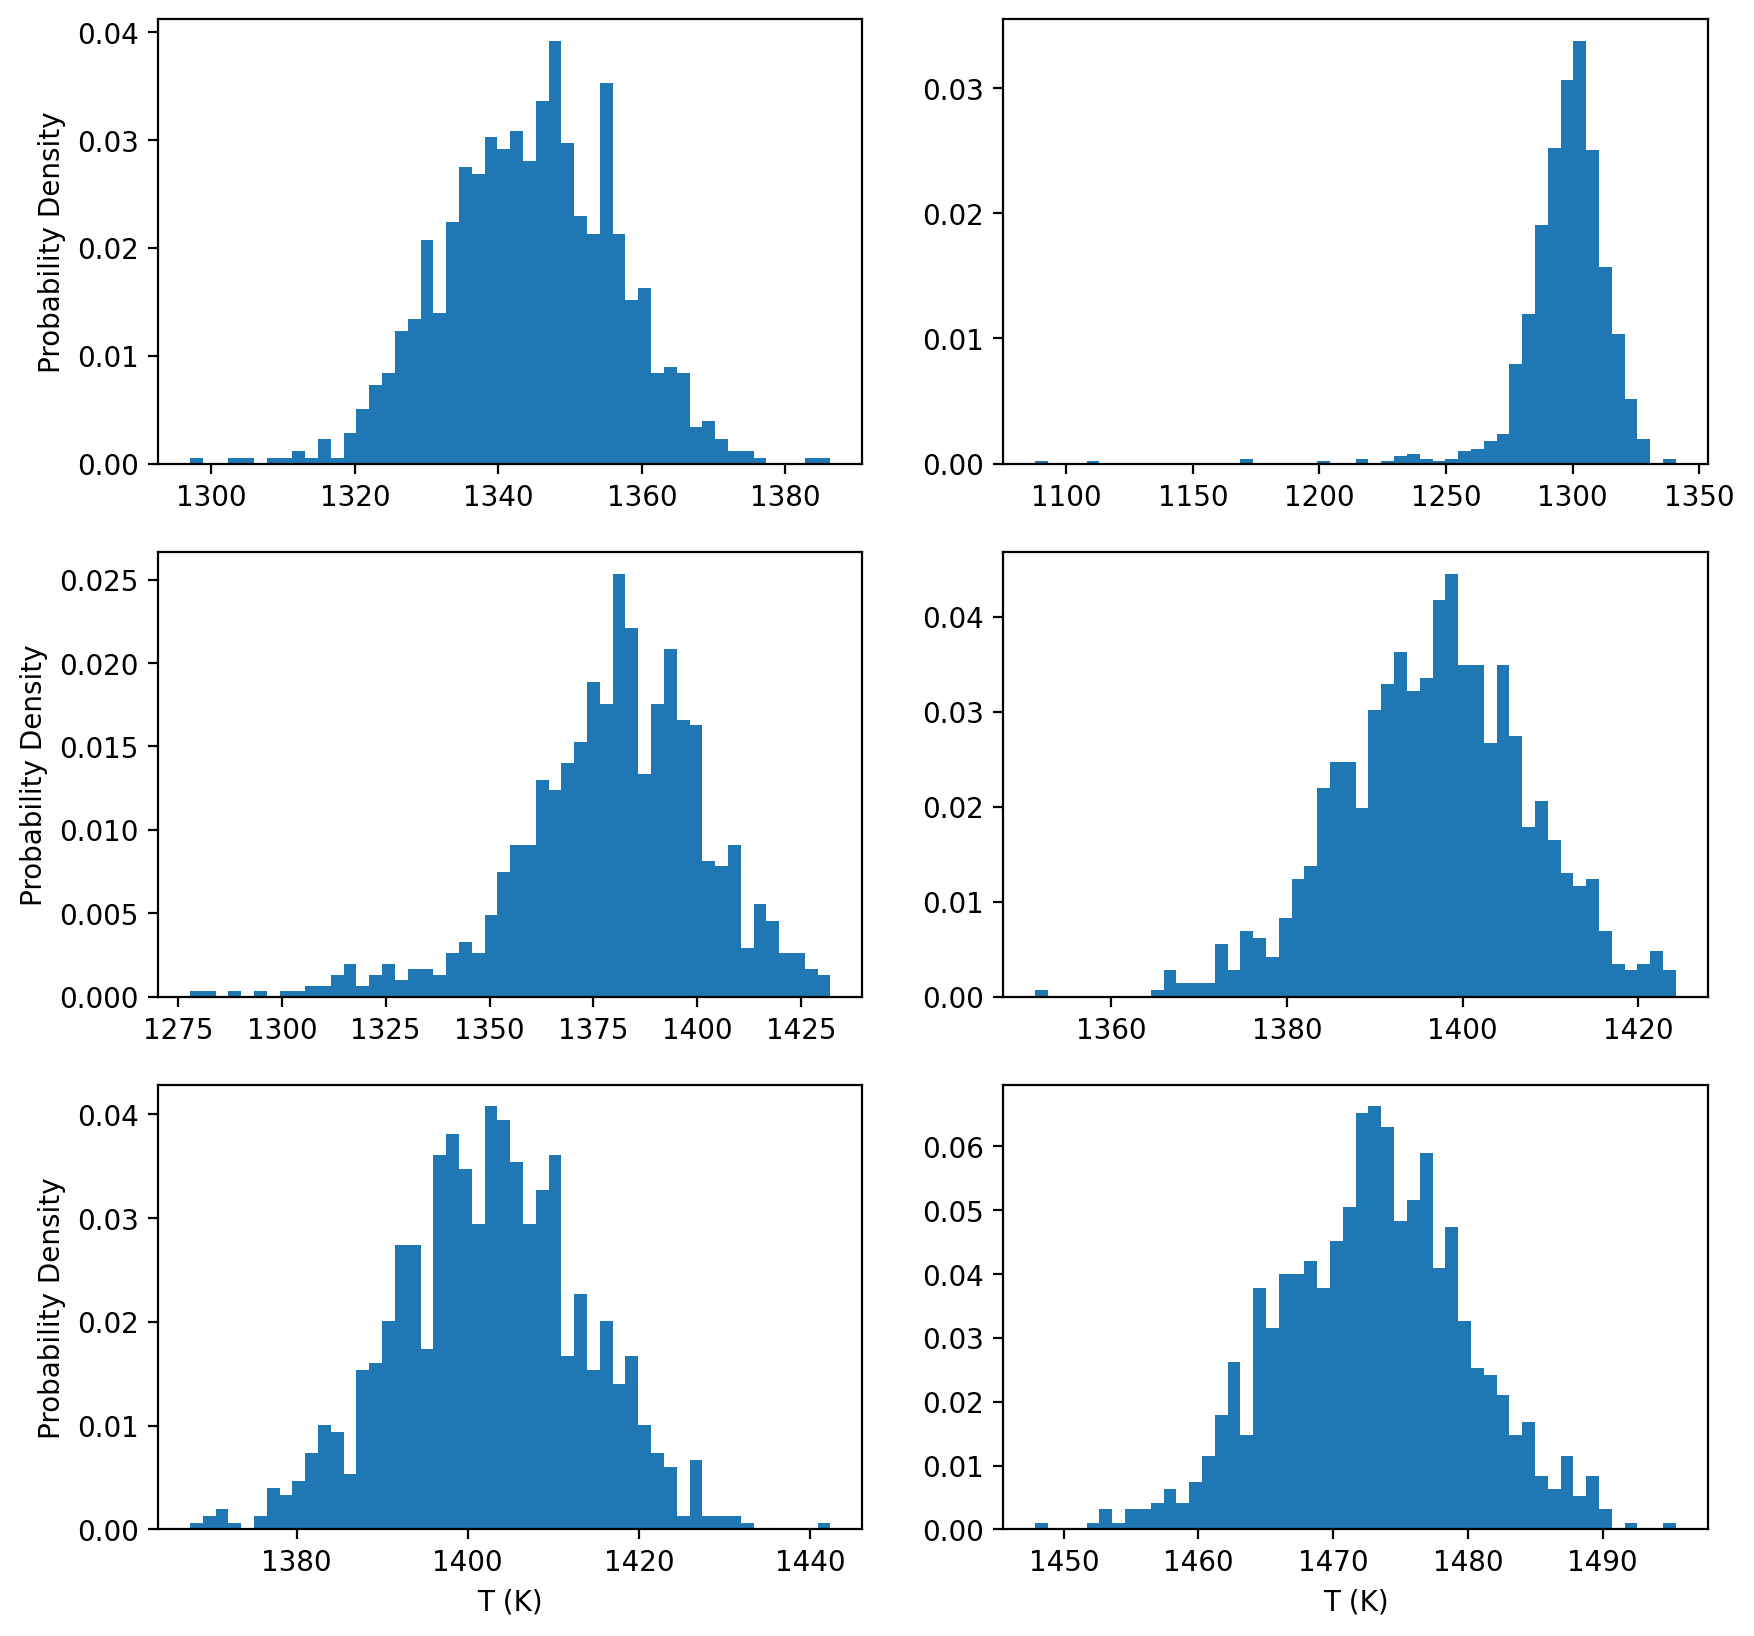

In [27]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==0, "T_K_calc"], bins=50, density = True)
ax2.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==1, "T_K_calc"], bins=50, density = True)
ax3.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==2, "T_K_calc"], bins=50, density = True)
ax4.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==3, "T_K_calc"], bins=50, density = True)
ax5.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==4, "T_K_calc"], bins=50, density = True)
ax6.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==5, "T_K_calc"], bins=50, density = True)
ax6.set_xlabel('T (K)')
ax5.set_xlabel('T (K)')
ax1.set_ylabel('Probability Density')
ax3.set_ylabel('Probability Density')
ax5.set_ylabel('Probability Density')

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Probability Density')

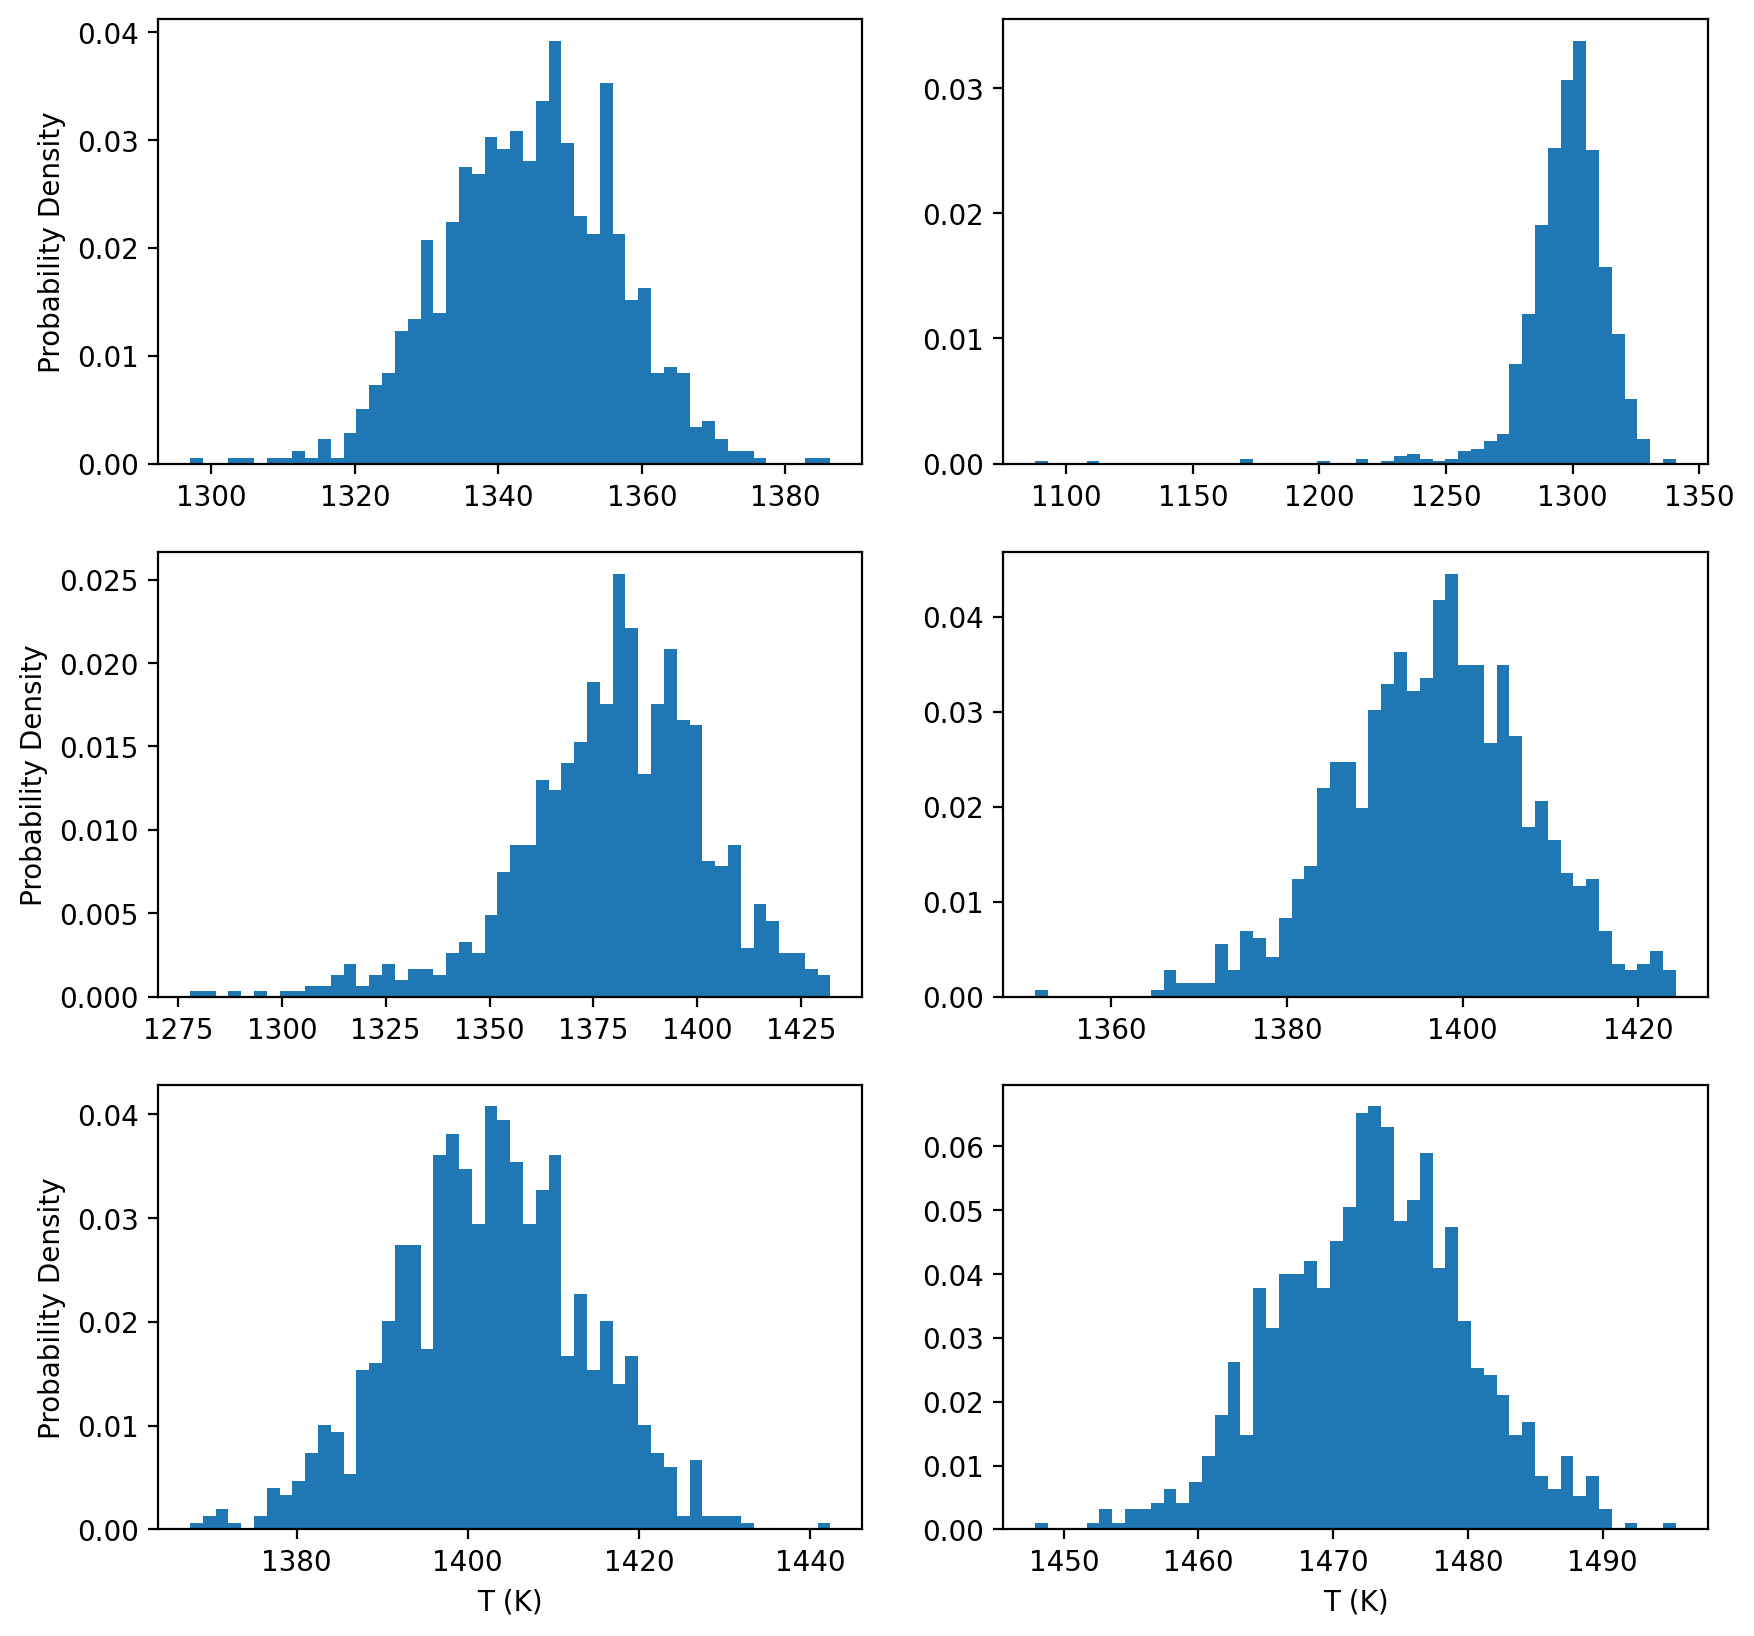

In [29]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==0, "T_K_calc"], bins=50, density = True)
ax2.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==1, "T_K_calc"], bins=50, density = True)
ax3.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==2, "T_K_calc"], bins=50, density = True)
ax4.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==3, "T_K_calc"], bins=50, density = True)
ax5.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==4, "T_K_calc"], bins=50, density = True)
ax6.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==5, "T_K_calc"], bins=50, density = True)
ax6.set_xlabel('T (K)')
ax5.set_xlabel('T (K)')
ax1.set_ylabel('Probability Density')
ax3.set_ylabel('Probability Density')
ax5.set_ylabel('Probability Density')

## Other snips

In [6]:
myCpxs=myCpxs1

In [8]:
pt.calculate_cpx_only_press_temp(
cpx_comps=myCpxs, equationP="P_Put2008_eq32b",
equationT="T_Put2008_eq32d")

,P_kbar_calc,T_K_calc
0,5.330423,1487.588565
1,4.912641,1476.307186
2,5.904306,1501.021450
3,6.166675,1498.053851
4,7.700500,1506.447225
5,10.005245,1535.593208
6,5.545181,1496.359027
